('data shape', (1001, 106))
('data_mean shape', (1001,))
('data shape', (1001, 105))
('data_mean shape', (1001,))


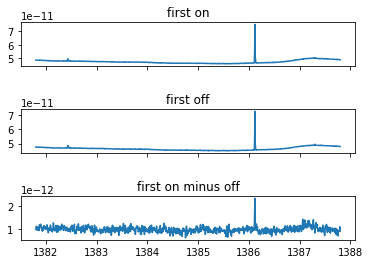

In [35]:
from astropy.io import fits
import matplotlib.pyplot as plt
import os
import numpy as np

def mean_onoff(path, data=None):
    for dir_entry in os.listdir(path):
      dir_entry_path = os.path.join(path, dir_entry)
      if os.path.isfile(dir_entry_path):
        hdulist = fits.open(dir_entry_path)
        
        # unit of dB tranfering a into linear space
        data_linear  = np.power(10.0, hdulist[0].data/10.0)
        
        if data is None:
            data = data_linear
        else:
            data=np.append(data, data_linear, axis=1)
    print('data shape',data.shape)
    data_mean=np.mean(data, axis=1)
    print('data_mean shape',data_mean.shape)
    return data_mean #as a numpy array
    
f,(ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# fa=1381.8; fb =  1387.8
freq = np.linspace(1381.8, 1387.8, 1001)

# read between 2050-2100 as first on
first_on = mean_onoff('../first-on')
ax1.plot(freq, first_on)#, label='first on')
ax1.set_title('first on')

# ax1.legend(loc="upper right")

# read between 2110-2120 as first off
first_off = mean_onoff('../first-off')
ax2.plot(freq, first_off)
ax2.set_title('first off')

first_on_off = first_on - first_off
# ax3.set_title('first on minus off')
# ax3.set_ylim(-1, 1.5)
ax3.plot(freq, first_on_off)
ax3.set_title('first on minus off')

#ax1.ylabel('first on minus off')

f.subplots_adjust(hspace=1)

#plt.xlim(1381.8, 1387.8)
# axes.set_ylim([ymin,ymax])
# plt.ylim(4.5, 6)
plt.savefig('first-on-off')
plt.show()
# hdulist = fits.open('data_20171103T215857.fits')

# plt.plot(hdulist[0].data)
# plt.show()


('data shape', (1001, 105))
('data_mean shape', (1001,))
('data shape', (1001, 106))
('data_mean shape', (1001,))


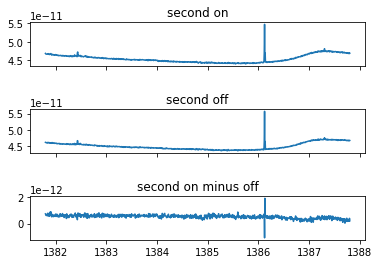

In [36]:
f,(ax4, ax5, ax6) = plt.subplots(3, 1, sharex=True)
# read between 2130-2140 as second on
second_on = mean_onoff('../second-on')
ax4.plot(freq, second_on)
ax4.set_title('second on')

# read between 2150-2200 as second off
second_off = mean_onoff('../second-off')
ax5.plot(freq, second_off)
ax5.set_title('second off')

second_on_off = second_on - second_off
# ax4.set_title('second on minus off')
ax6.plot(freq, second_on_off)
ax6.set_title('second on minus off')

f.subplots_adjust(hspace=1)
plt.savefig('second-on-off')
plt.show()

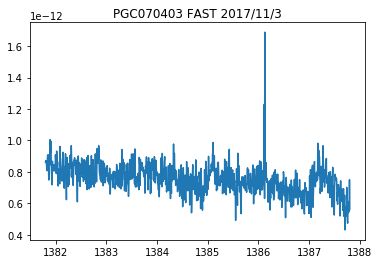

In [38]:
first_second_mean = (first_on_off + second_on_off)/2.
plt.plot(freq, first_second_mean)
plt.title('PGC070403 FAST 2017/11/3')
plt.savefig('first-second-mean')
plt.show()